In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [198]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

plt.style.use('ggplot')
sns.set_style('whitegrid')

In [199]:
train_df=pd.read_csv("/kaggle/input/aia-exam-ml2-xt121/train.csv")
train_df.head()

,LOT,INTIME,OUTTIME,OPERATION,EQUIPMENT_2,EQPTYPE,DIRECTION,USERID,VESSEL,CC_RESULT,...,USERDEFINECOL60,USERDEFINECOL01,USERDEFINECOL10,COLORNAME,USERDEFINECOL23,USERDEFINECOL24,USERDEFINECOL26,USERDEFINECOL27,USERDEFINECOL04,USERDEFINECOL38
0,0,2022/02/13 23:38:26,2022/02/14 05:40:17,21DY,DYE2115,亞磯600KG,下走,u73319,1.000,Y,...,EVF05528,N06A2,L161AT001-0-A,黑,亞磯600KG,D8,DYE2115,Dye20220215000112,NaN,NaN
1,1,2021/12/21 20:21:37,2021/12/22 03:01:10,21DY,DYE2102,東庚600,上走,u73319,2.000,Y,...,EVF06203,L01A2,L21AKU009-0-B,墨水黑,東庚300KG,D6,DYE2102,Dye20211222000201,NaN,NaN
2,2,2021/11/14 02:43:09,2021/11/14 10:08:49,21DY,DYE2113,亞磯600KG,下走,u72946,2.000,Y,...,EVF03333,A09B2,L164LU018-2-H,露露黑,東庚600,D5,DYE2108,Dye20211204000170,NaN,NaN
3,3,2022/02/17 00:36:27,2022/02/17 06:49:07,21DY,DYE2128,東庚300KG,上走,u72521,2.000,Y,...,EVF09188,F02B1,L209OR004-0-A,土黃,東庚300KG,D6,DYE2109,Dye20220221000168,NaN,NaN
4,4,2021/10/21 08:54:58,2021/10/21 13:03:46,21DY,DYE2139,東庚300KG,上走,u73002,2.000,Y,...,EVF05629,YA02,L219TG014-0-A,木質棕,東庚600KG,E3,DYE2105,Dye20211024000036,NaN,NaN


In [200]:
test_df=pd.read_csv("/kaggle/input/aia-exam-ml2-xt121/test.csv")
test_df.head()

,LOT,INTIME,OUTTIME,OPERATION,EQUIPMENT_2,EQPTYPE,DIRECTION,USERID,VESSEL,MachineNo,...,USERDEFINECOL60,USERDEFINECOL01,USERDEFINECOL10,COLORNAME,USERDEFINECOL23,USERDEFINECOL24,USERDEFINECOL26,USERDEFINECOL27,USERDEFINECOL04,USERDEFINECOL38
0,8,2021/11/20 01:40:14,2021/11/20 06:13:55,21DY,DYE2132,東庚300KG,上走,u73152,1.000,2132,...,FVF040750000002498,B67A1,L118NN081-0-C,灰,東庚300KG,D6,NaN,Dye20211120000515,NaN,NaN
1,18,2022/01/08 09:09:54,2022/01/08 19:15:45,21DY,DYE2120,東庚300KG,上走,u73405,1.000,2120,...,FVF051520000002498,S03A2,L219LU082-2-H,茶綠,亞磯300KG,D9,DYE2112,Dye20220111000180,NaN,NaN
2,35,2021/10/10 02:11:28,2021/10/10 07:11:36,21DY,DYE2103,東庚300KG,上走,u73319,1.000,2103,...,FVF053480000002498,B95B2,L215LU106-0-C,草莓奶昔,華震300,E2,NaN,Dye20211011000485,NaN,NaN
3,38,2021/11/02 16:48:10,2021/11/02 22:34:28,21DY,DYE2126,東庚300KG,上走,u73433,1.000,2126,...,FVF055840000002498,A02B1,L215LU059-0-C,月桂綠,東庚300KG,D6,DYE2126,Dye20211104000362,NaN,NaN
4,51,2021/10/06 08:15:52,2021/10/06 15:03:15,21DY,DYE2128,東庚300KG,上走,u73433,1.000,2128,...,EVF08160,B01A1,L20CLU086-0-D,古著紫,東庚600,D5,DYE2128,Dye20211013000194,NaN,NaN


In [202]:
print('The shape of df_train:', train_df.shape)
print('The shape.of df_test:', test_df.shape)
print('Target Variable: CC_RESULT')

The shape of df_train: (5411, 77)
The shape.of df_test: (791, 76)
Target Variable: CC_RESULT


In [203]:
train_df['CC_RESULT'].describe()

count     5411
unique       3
top          Y
freq      4581
Name: CC_RESULT, dtype: object

In [204]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5411 entries, 0 to 5410
Data columns (total 77 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LOT                     5411 non-null   int64  
 1   INTIME                  5411 non-null   object 
 2   OUTTIME                 5411 non-null   object 
 3   OPERATION               5411 non-null   object 
 4   EQUIPMENT_2             5411 non-null   object 
 5   EQPTYPE                 5411 non-null   object 
 6   DIRECTION               5411 non-null   object 
 7   USERID                  5411 non-null   object 
 8   VESSEL                  5407 non-null   float64
 9   CC_RESULT               5411 non-null   object 
 10  MachineNo               5411 non-null   int64  
 11  BatchNo                 5411 non-null   object 
 12  BatchId                 5411 non-null   int64  
 13  DICId                   5411 non-null   int64  
 14  BatchStartTime          5411 non-null   

In [205]:
def draw_missing_data(df):
    fx, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 13))

    df_na = df.isnull().mean().sort_values(ascending=True)  # 全欄位
    df_na_ = df_na[df_na > 0.]  # 有缺失值欄位

    # 顯示全部欄位
    df_na.plot.barh(color='black', ax=axes[0])
    axes[0].axvline(x=0.1, color='r', linestyle='--')
    _ = axes[0].set_title('Missing Values Shares per Column', fontsize=20)

    # Zoom in(只顯示部份的欄位)
    df_na_.plot.barh(color='black', ax=axes[1], fontsize=20)
    axes[1].axvline(x=0.1, color='r', linestyle='--')
    _ = axes[1].set_title('Missing Values Shares per Column (Zoom in)', fontsize=20)

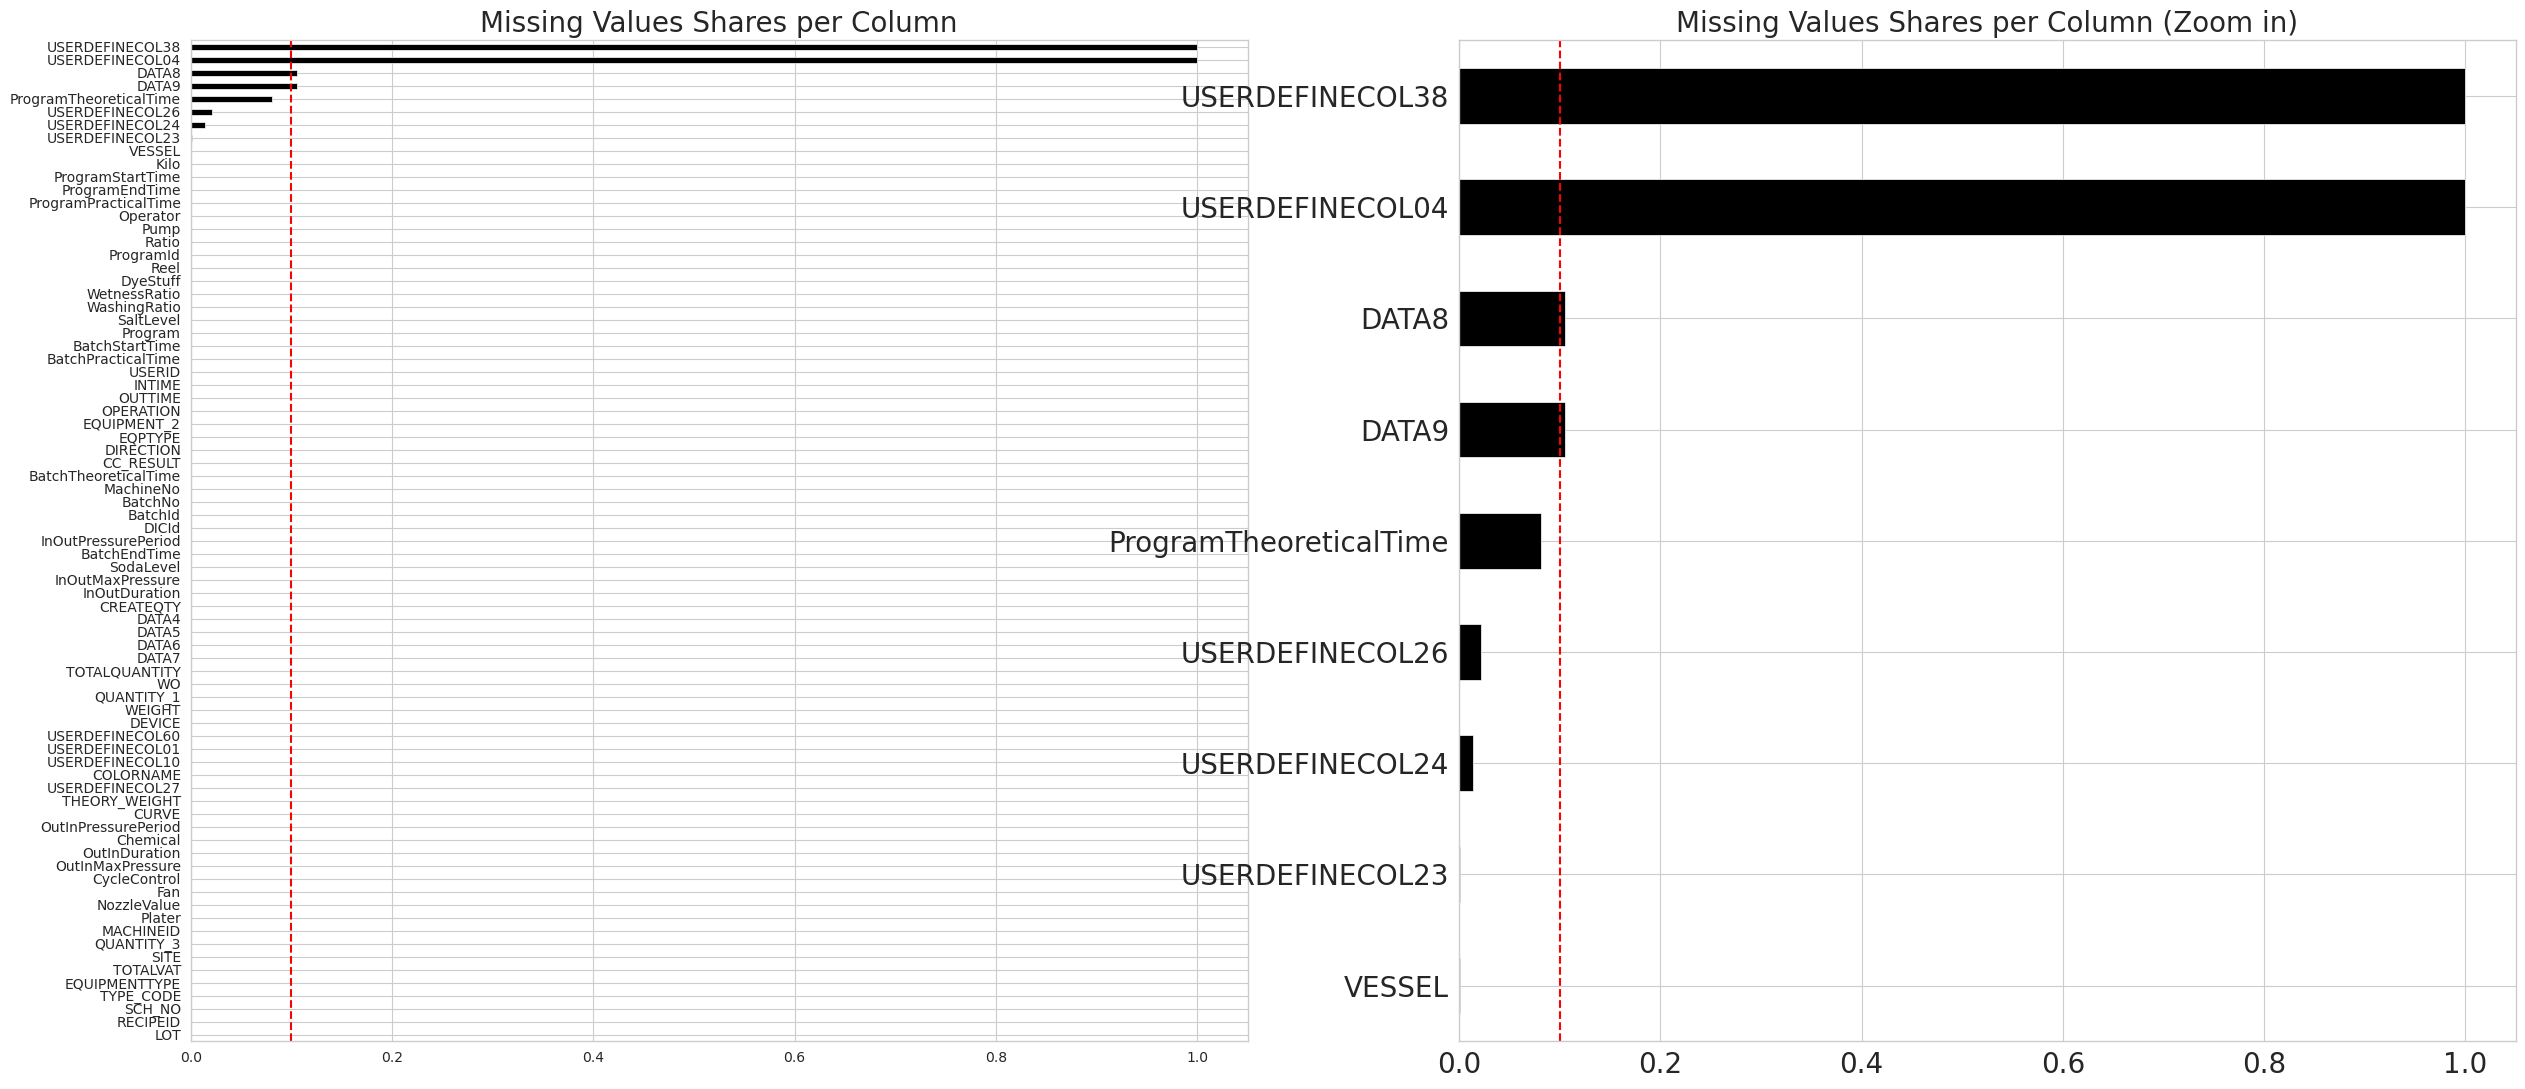

In [206]:
draw_missing_data(train_df)

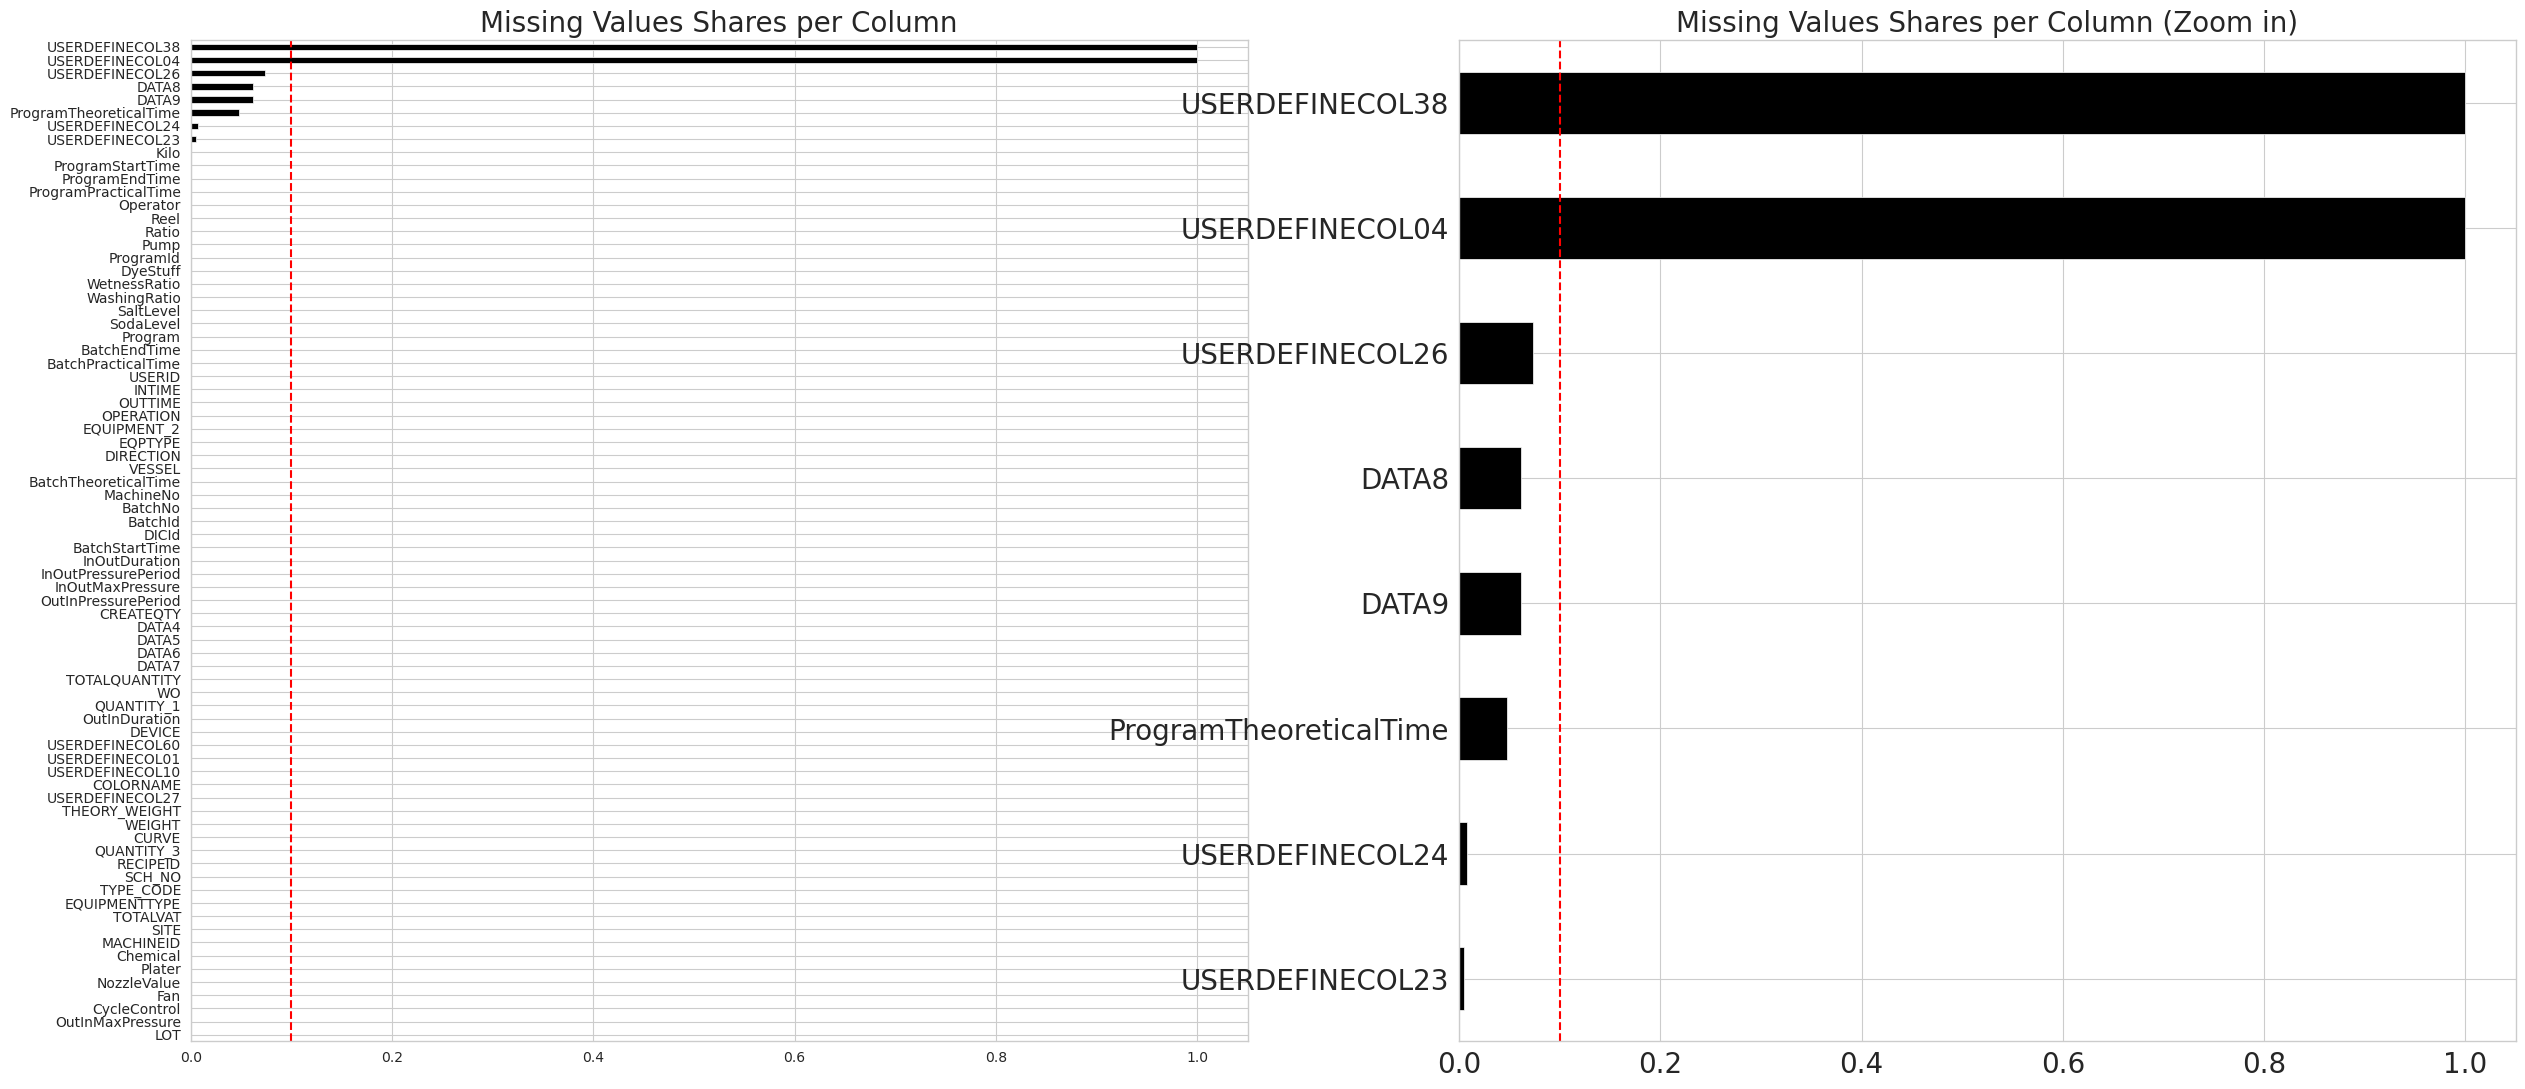

In [207]:
draw_missing_data(test_df)

In [208]:
na_drop_rt = 0.1  # Cols with missing rate above the threshold are dropped.

train_df_na = train_df.isnull().mean().sort_values(ascending=True)
test_df_na = test_df.isnull().mean().sort_values(ascending=True)

train_df_na_cols = set(train_df_na[train_df_na > na_drop_rt].index.values)
test_df_na_cols = set(test_df_na[test_df_na > na_drop_rt].index.values)

na_cols = list(train_df_na_cols.union(test_df_na_cols))
print('Cols to be dropped in both train and test set:\n', na_cols)

Cols to be dropped in both train and test set:
 ['USERDEFINECOL38', 'DATA8', 'USERDEFINECOL04', 'DATA9']


In [209]:
train_df = train_df.drop(columns=na_cols)
test_df = test_df.drop(columns=na_cols)

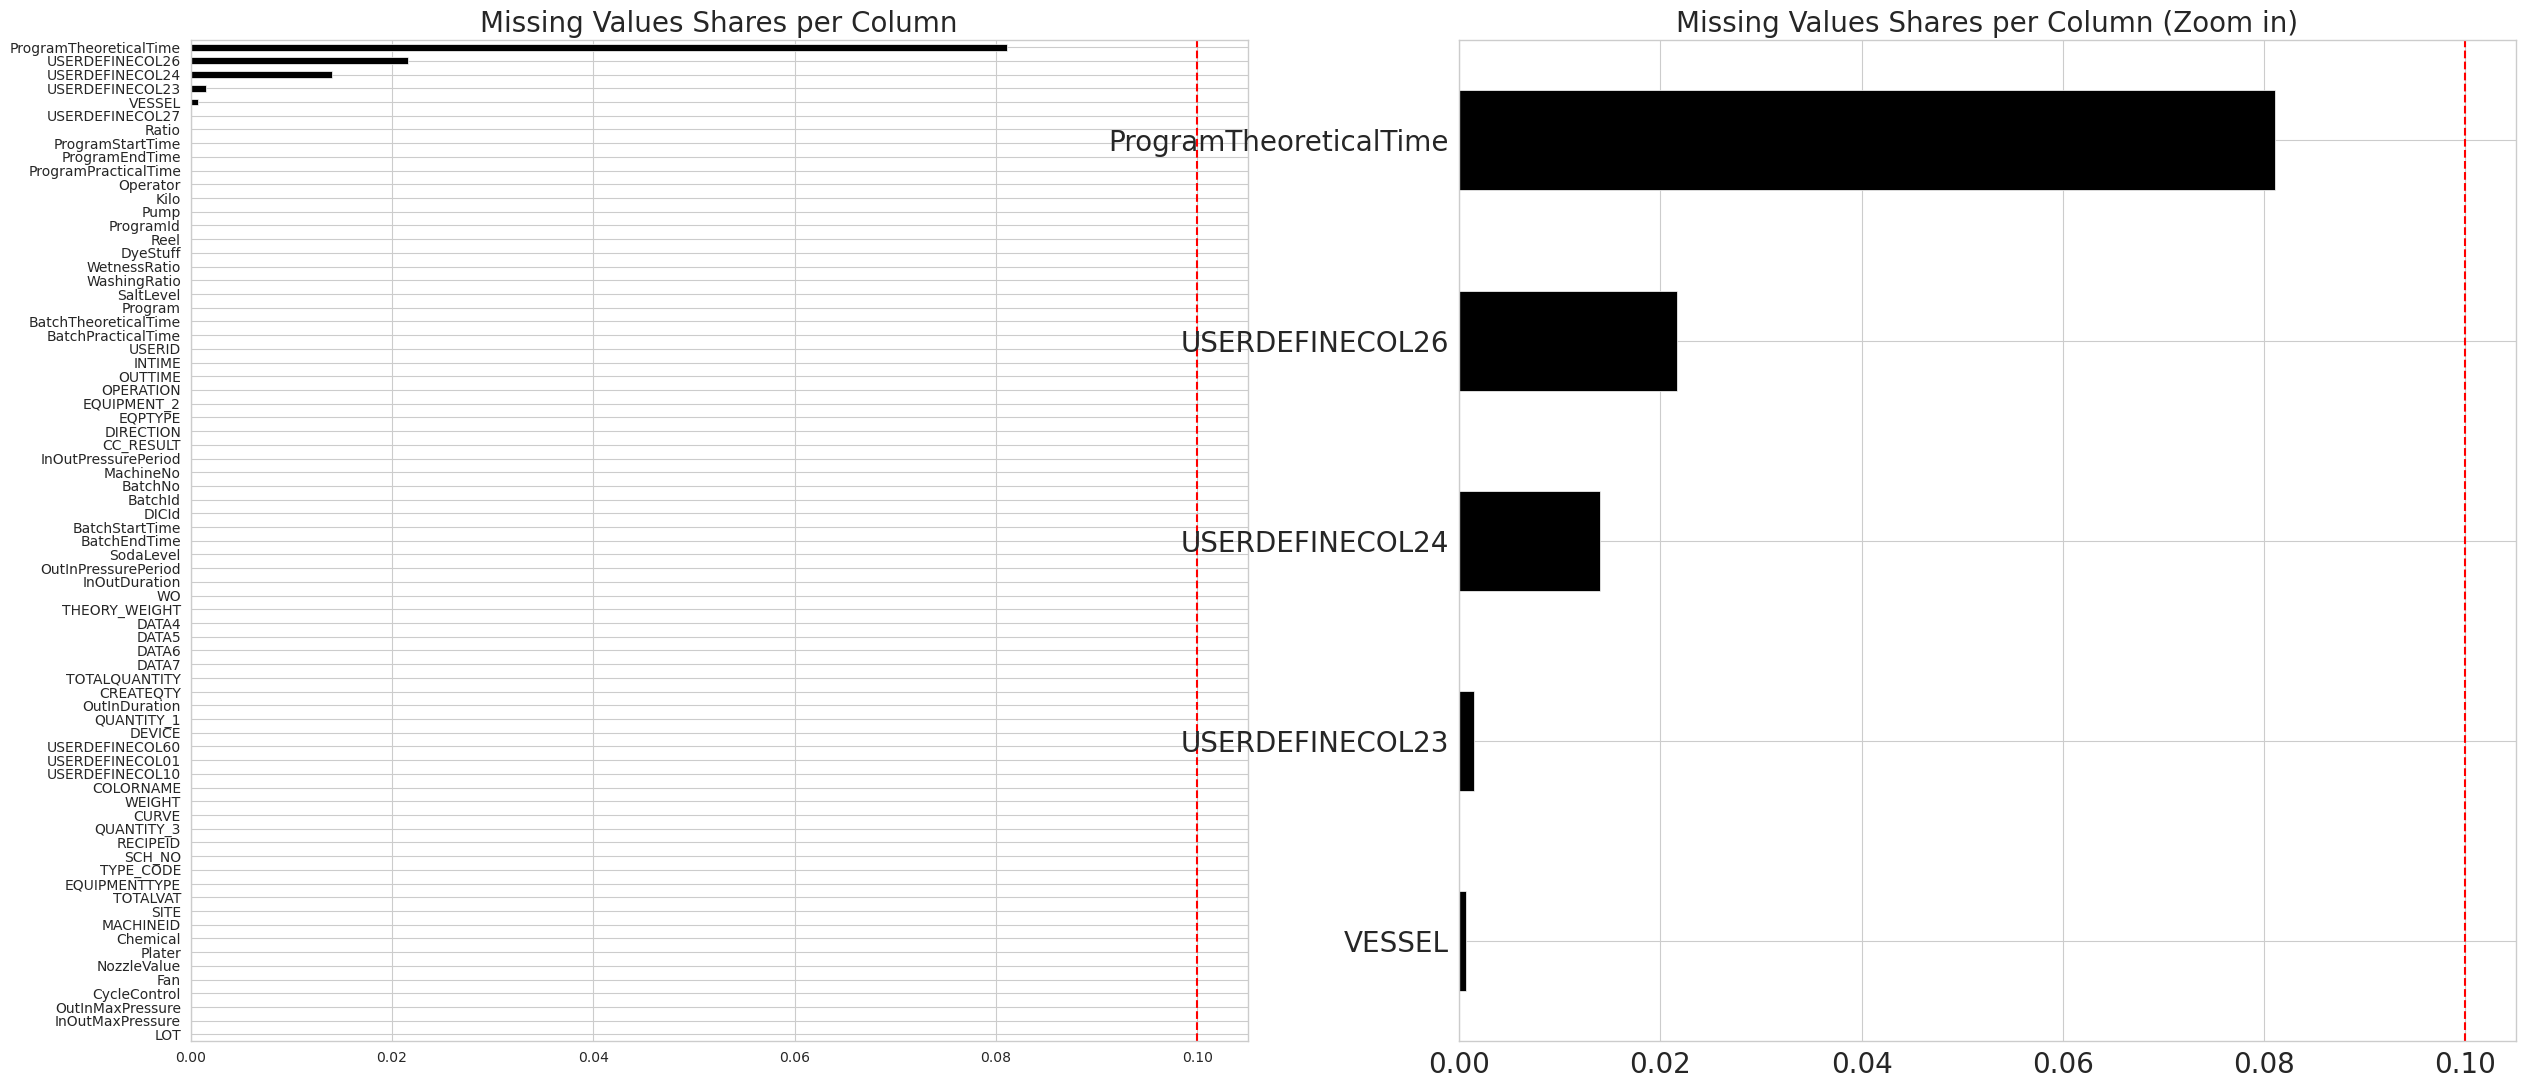

In [210]:
draw_missing_data(train_df)

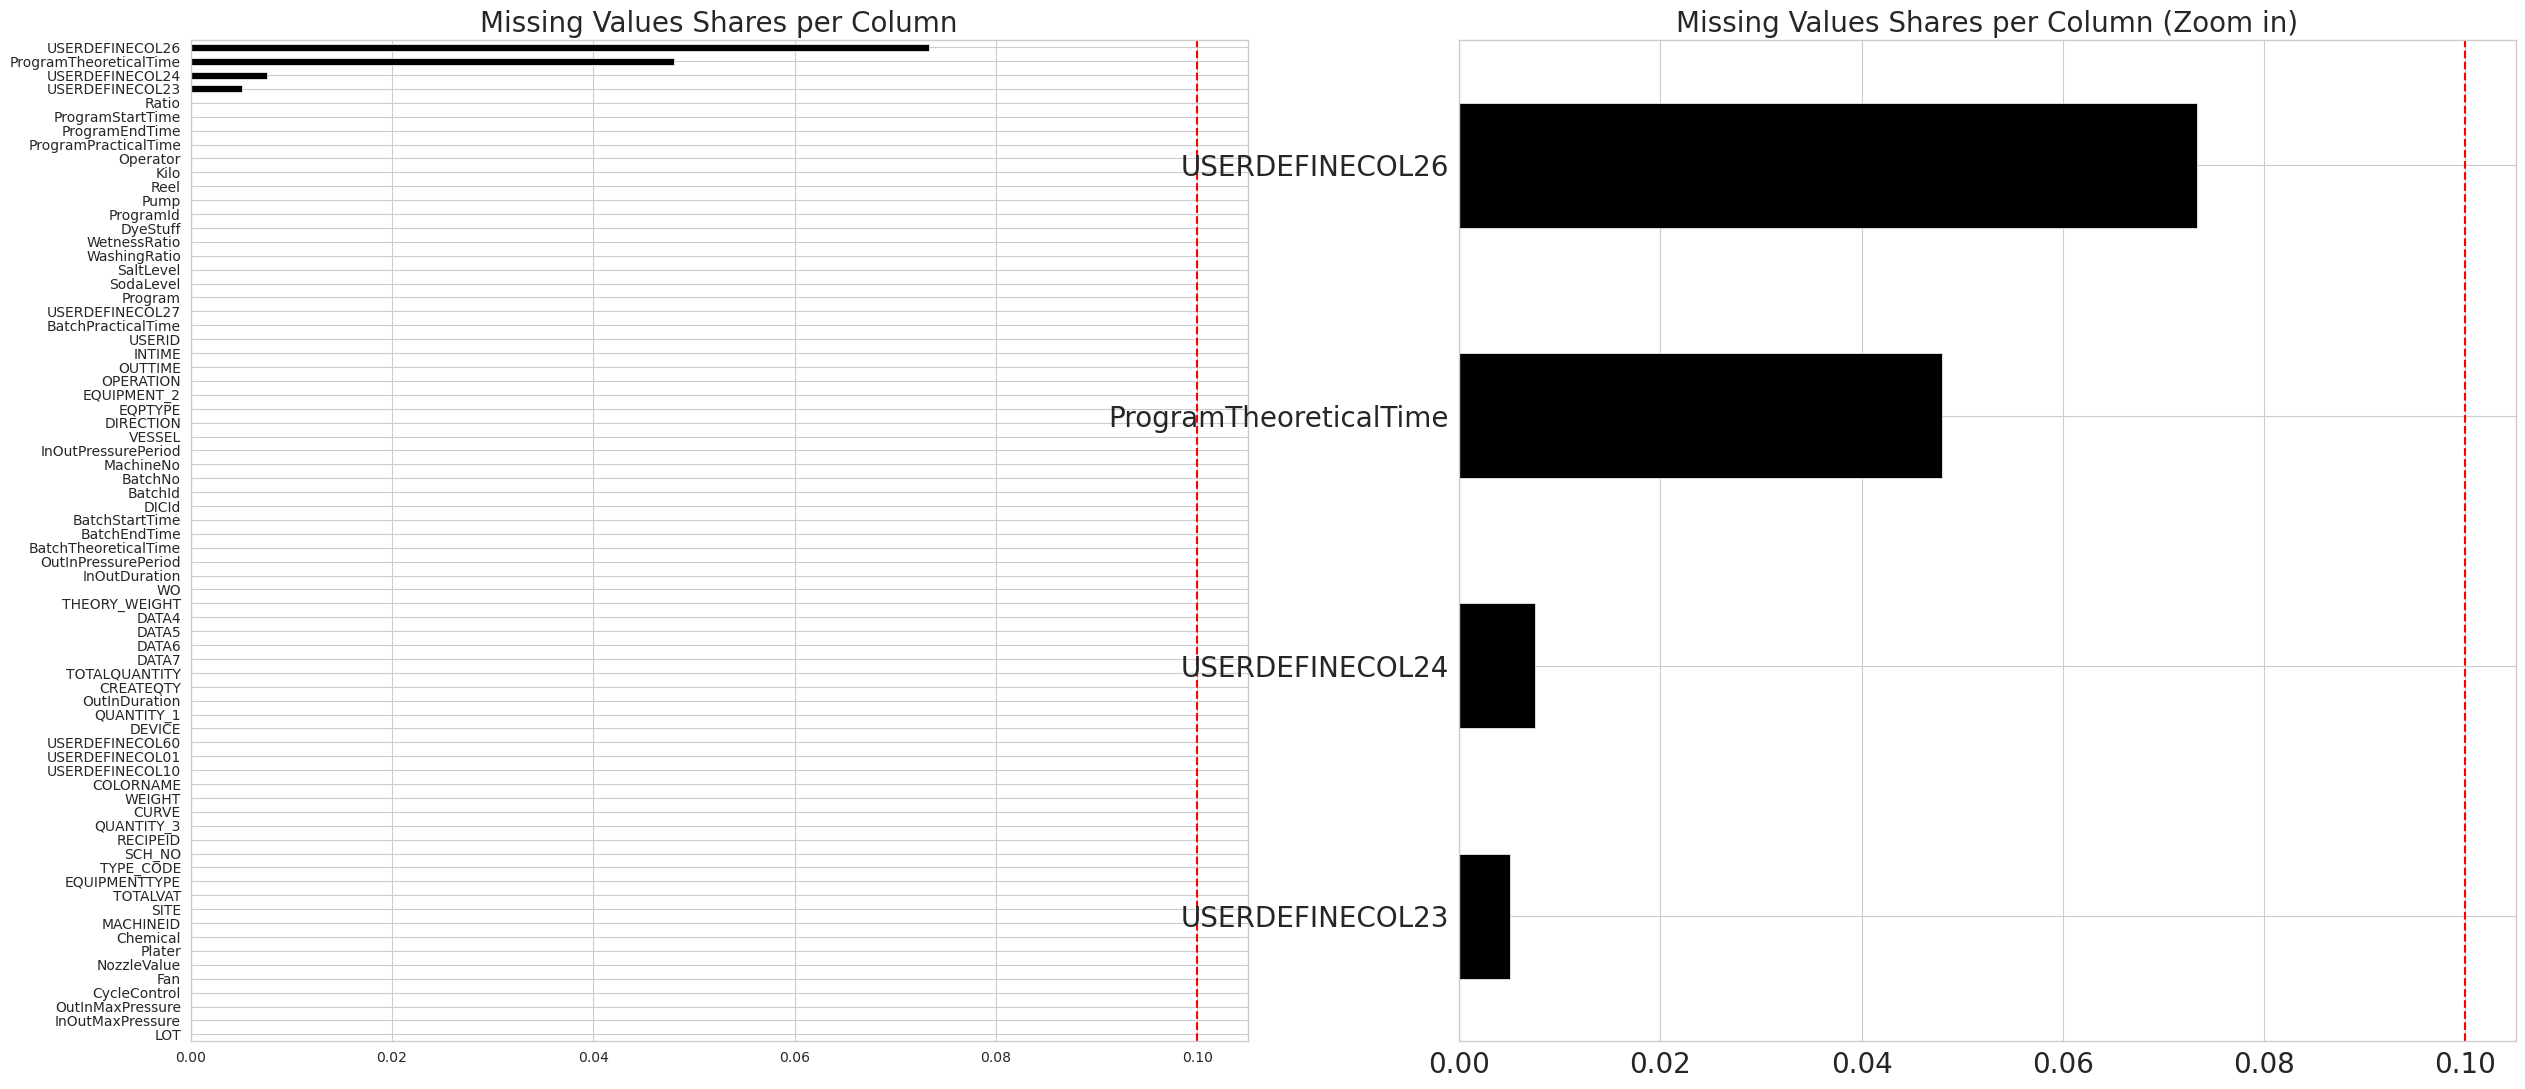

In [211]:
draw_missing_data(test_df)

In [212]:
train_df_na_cols = set(train_df.columns.values[train_df.isnull().any()])
test_df_na_cols = set(test_df.columns.values[test_df.isnull().any()])

cols = list(set(train_df_na_cols).union(test_df_na_cols))
train_df[cols].info(verbose=False)

cat_cols = train_df[cols].select_dtypes(include='object').columns.values
num_cols = train_df[cols].select_dtypes(exclude='object').columns.values

print(f'\nNA cols remains: {len(cat_cols)} string cols and  {len(num_cols)} numeric.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5411 entries, 0 to 5410
Columns: 5 entries, USERDEFINECOL26 to USERDEFINECOL24
dtypes: float64(2), object(3)
memory usage: 211.5+ KB

NA cols remains: 3 string cols and  2 numeric.


In [213]:
cat_cols

array(['USERDEFINECOL26', 'USERDEFINECOL23', 'USERDEFINECOL24'],
      dtype=object)

In [214]:
num_cols

array(['ProgramTheoreticalTime', 'VESSEL'], dtype=object)

In [215]:
# 針對類別欄位 (有高頻眾數的)
train_df_mode = train_df[cat_cols].describe(exclude=[np.number])
train_df_mode = train_df_mode.loc[['top','freq'],:].transpose()
train_df_mode_dict = train_df_mode[train_df_mode.freq > 1000]['top'].to_dict()

# 針對類別欄位 (沒有高頻眾數的)
none_dict = {}
for key in train_df_mode[train_df_mode.freq <= 1000].index.values:
    none_dict[key] = 'NA'
    
# 合併高頻眾數填補值和低頻眾數填補值
train_df_mode_dict.update(none_dict)
train_df_mode_dict

{'USERDEFINECOL23': '東庚600', 'USERDEFINECOL24': 'D5', 'USERDEFINECOL26': 'NA'}

In [216]:
# 進行補值
train_df.fillna(value=train_df_mode_dict, inplace=True)
train_df.shape

(5411, 73)

In [217]:
# 針對類別欄位 (有高頻眾數的)
test_df_mode = test_df[cat_cols].describe(exclude=[np.number])
test_df_mode = test_df_mode.loc[['top','freq'],:].transpose()
test_df_mode_dict = test_df_mode[test_df_mode.freq > 1000]['top'].to_dict()

# 針對類別欄位 (沒有高頻眾數的)
none_dict = {}
for key in test_df_mode[test_df_mode.freq <= 1000].index.values:
    none_dict[key] = 'NA'
    
# 合併高頻眾數填補值和低頻眾數填補值
test_df_mode_dict.update(none_dict)
test_df_mode_dict

{'USERDEFINECOL26': 'NA', 'USERDEFINECOL23': 'NA', 'USERDEFINECOL24': 'NA'}

In [218]:
# 進行補值
test_df.fillna(value=test_df_mode_dict, inplace=True)

In [219]:
train_df['VESSEL'].fillna(value=train_df['VESSEL'].mean(), inplace=True)
train_df['ProgramTheoreticalTime'].fillna(value=train_df['ProgramTheoreticalTime'].mean(), inplace=True)

In [220]:
test_df['VESSEL'].fillna(value=test_df['VESSEL'].mean(), inplace=True)
test_df['ProgramTheoreticalTime'].fillna(value=test_df['ProgramTheoreticalTime'].mean(), inplace=True)

In [221]:
print('Training set cols have missing values: ', sum(train_df.isnull().any()))
print('Testing set cols have missing values: ', sum(test_df.isnull().any()))

Training set cols have missing values:  0
Testing set cols have missing values:  0


In [232]:
y = train_df.CC_RESULT


0       Y
1       Y
2       Y
3       Y
4       Y
       ..
5406    Y
5407    Y
5408    Y
5409    Y
5410    Y
Name: CC_RESULT, Length: 5411, dtype: object

KeyError: 'CC_RESULT'

In [222]:
num_cols = train_df[cols].select_dtypes(include=np.number).columns.values
cat_cols = train_df[cols].select_dtypes(include='object').columns.values

In [223]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', MinMaxScaler(), num_cols)],
    verbose=True)

In [224]:
# Apply 在訓練資料集
X_train = preprocessor.fit_transform(train_df[cols])
X_train.shape

[ColumnTransformer] ........... (1 of 2) Processing cat, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing num, total=   0.0s


(5411, 58)

In [225]:
# Apply 在測試資料集
X_test = preprocessor.transform(test_df[cols])
X_test.shape

(791, 58)

In [228]:
X = train_df.drop('CC_RESULT',axis=1)
y = train_df['CC_RESULT']
X.shape

AttributeError: drop not found

In [227]:
y.shape

(5411,)

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y, random_state=5, test_size=0.2)

In [192]:
print(f'X_train',X_train.shape)  #Printing the X_train Features Shape
print(f'y_train',y_train.shape)  #Printing the y_train Labels Shape
print(f'X_val',X_val.shape)    #Printing the X_test Features Shape
print(f'y_val',y_val.shape)    #Printing the y_test Labels  Shape

X_train (4328, 72)
y_train (4328,)
X_val (1083, 72)
y_val (1083,)


In [193]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [194]:
def rmse(model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    RMSE_train = np.sqrt(mean_squared_error(y_train, pred_train))
    RMSE_val = np.sqrt(mean_squared_error(y_val, pred_val))
    return RMSE_train, RMSE_val

In [195]:
models = [LinearRegression(), Lasso(), KNeighborsRegressor(), SVR(), 
          DecisionTreeRegressor(), RandomForestRegressor(), 
          XGBRegressor(objective ='reg:squarederror')]

names = ['LR', 'Lasso', 'KNN', 'SVR', 'DT', 'RF', 'XGB']
for name, model in zip(names, models):
    RMSE_train, RMSE_val = rmse(model, X_train, X_val, y_train, y_val)
    print(f'{name}:')
    print(f'　　Training RMSE: {RMSE_train:.4f}, Validation RMSE: {RMSE_val:.4f}')

ValueError: could not convert string to float: '2021/10/10 12:41:07'